In [6]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable

ERROR: Exception:
Traceback (most recent call last):
  File "S:\anaconda\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "S:\anaconda\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "S:\anaconda\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "S:\anaconda\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "S:\anaconda\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "S:\anaconda\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "S:\anaconda\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "S:\anaconda\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read operation timed out

During handling of the above exception, another exception occ

    return bool(self._sequence)
  File "S:\anaconda\lib\site-packages\pip\_internal\resolution\resolvelib\found_candidates.py", line 140, in __bool__
    return any(self)
  File "S:\anaconda\lib\site-packages\pip\_internal\resolution\resolvelib\found_candidates.py", line 128, in <genexpr>
    return (c for c in iterator if id(c) not in self._incompatible_ids)
  File "S:\anaconda\lib\site-packages\pip\_internal\resolution\resolvelib\found_candidates.py", line 32, in _iter_built
    candidate = func()
  File "S:\anaconda\lib\site-packages\pip\_internal\resolution\resolvelib\factory.py", line 204, in _make_candidate_from_link
    self._link_candidate_cache[link] = LinkCandidate(
  File "S:\anaconda\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 295, in __init__
    super().__init__(
  File "S:\anaconda\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 156, in __init__
    self.dist = self._prepare()
  File "S:\anaconda\lib\site-packages

# DNN (Deep Neural Networks)

## Gradient Descent

Before jumping right into neural networks let's look at a simple idea of how we can perform gradient descent.

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA 

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['class'] = iris.target_names[iris.target]

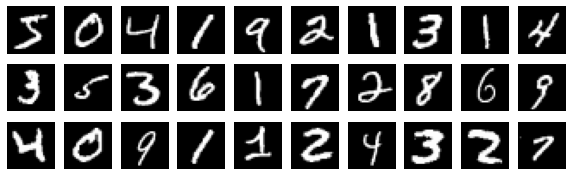

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Normalize
X_train = X_train / 255
X_test = X_test / 255

plt.figure(figsize=(10, 3))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
X_train_flat = X_train.reshape((X_train.shape[0], 28*28))
X_test_flat = X_test.reshape((X_test.shape[0], 28*28))

y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [1]:
loss = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

NameError: name 'model' is not defined

Let's explore some predictions.

<AxesSubplot:>

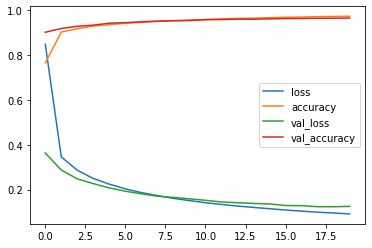

In [ ]:
pd.DataFrame(loss.history).plot()

Structurally this is the same network we had before, thus our error rate is expected to be simmilar.

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 96.47%


In [ ]:
plt.figure(figsize=(10, 10))
for label in range(10):
    for i in range(10):
        plt.subplot(10, 10, label * 10 + i + 1)
        plt.imshow(X_test[pred == label][i], cmap='gray')
        plt.axis('off')
plt.show()
